In [68]:
print("Introduction to Bayesian Inference with Stan")

Introduction to Bayesian Inference with Stan


In [69]:
import pystan
import stan_utility
import matplotlib
import matplotlib.pyplot as plot
import numpy

In [70]:
light = "#DCBCBC"
light_highlight = "#C79999"
mid = "#B97C7C"
mid_highlight = "#A25050"
dark = "#8F2727"
dark_highlight = "#7C0000"
green = "#00FF00"

In [71]:
data = pystan.read_rdump('poisson_progression.data.R')
data

OrderedDict([('N', array(1000)),
             ('y',
              array([4, 7, 2, 1, 0, 1, 5, 0, 2, 0, 5, 6, 7, 9, 0, 6, 0, 8, 5, 4, 0, 9, 0,
                     5, 0, 4, 0, 3, 2, 5, 7, 5, 3, 2, 0, 6, 5, 6, 7, 3, 5, 0, 0, 2, 5, 8,
                     4, 3, 3, 6, 7, 7, 0, 0, 5, 6, 3, 0, 5, 9, 0, 9, 0, 3, 0, 0, 5, 5, 6,
                     3, 5, 2, 5, 4, 4, 3, 5, 0, 3, 9, 2, 2, 0, 3, 8, 0, 8, 0, 0, 5, 0, 3,
                     7, 5, 5, 0, 5, 5, 5, 6, 0, 0, 6, 7, 5, 6, 7, 2, 5, 6, 5, 5, 0, 0, 5,
                     3, 0, 6, 6, 8, 5, 0, 4, 0, 0, 3, 5, 5, 5, 7, 3, 5, 7, 9, 0, 0, 3, 0,
                     0, 0, 4, 2, 7, 8, 8, 4, 5, 5, 7, 3, 9, 0, 5, 5, 3, 4, 7, 8, 5, 9, 0,
                     3, 3, 4, 0, 3, 7, 2, 0, 0, 4, 5, 5, 7, 6, 5, 2, 4, 0, 0, 0, 5, 6, 8,
                     0, 9, 8, 4, 9, 7, 4, 5, 0, 2, 9, 5, 0, 6, 9, 7, 1, 8, 0, 4, 1, 0, 0,
                     0, 6, 0, 5, 7, 4, 0, 4, 3, 3, 0, 0, 2, 5, 5, 6, 0, 4, 5, 3, 0, 9, 0,
                     5, 3, 5, 7, 3, 0, 5, 5, 4, 

In [72]:
print("Fit Poisson Model")
# Compilated model is saved with this wrapper and reused if it exists already.
model = stan_utility.compile_model('poisson_progression1.stan')
fit = model.sampling(data=data, seed=4938483)

Fit Poisson Model
Using cached StanModel


In [73]:
fit

Inference for Stan model: anon_model_19b499b62f3e95dcdb72e59b490489c9.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
lambda       3.47  1.4e-3   0.06   3.36   3.43   3.47   3.51   3.58   1775    1.0
y_ppc[0]     3.44    0.03   1.91    0.0    2.0    3.0    5.0    8.0   3987    1.0
y_ppc[1]     3.49    0.03   1.83    0.0    2.0    3.0    5.0    7.0   3837    1.0
y_ppc[2]      3.5    0.03   1.83    0.0    2.0    3.0    5.0    7.0   3997    1.0
y_ppc[3]     3.44    0.03   1.86    0.0    2.0    3.0    5.0    8.0   4000    1.0
y_ppc[4]     3.49    0.03   1.84    0.0    2.0    3.0    5.0    8.0   4000    1.0
y_ppc[5]     3.46    0.03   1.87    0.0    2.0    3.0    5.0    7.0   4000    1.0
y_ppc[6]     3.49    0.03   1.84    0.0    2.0    3.0    5.0    8.0   3865    1.0
y_ppc[7]     3.47    0.03   1.86    0.0    2.0    3.0    5.0    7.0   400

In [74]:
# Check diagnostics one by one
stan_utility.check_all_diagnostics(fit)
params = fit.extract()

n_eff / iter looks reasonable for all parameters


Rhat looks reasonable for all parameters
0.0 of 4000 iterations ended with a divergence (0.0%)
0 of 4000 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior


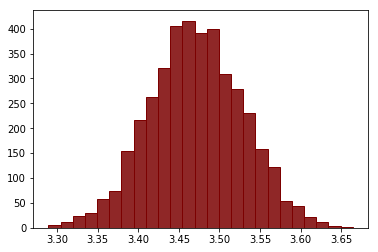

In [75]:
# Plot marginal posteriors
plot.hist(params['lambda'], bins = 25, color = dark, ec = dark_highlight)
plot.show()

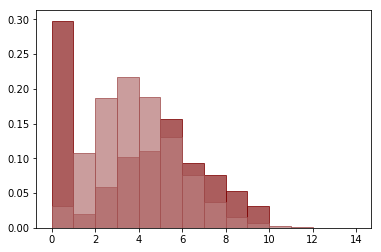

In [76]:
# Perform a posterior predictive check by plotting
# posterior predictive distributions against data
plot.hist(data['y'], bins=range(15), normed=True, alpha=0.75, color=dark, ec=dark_highlight)
plot.hist(params['y_ppc'].flatten(), bins=range(15), normed=True,
          alpha=0.75, color=mid, ec=mid_highlight)
plot.show()
# Darker is real data. Excessive zeros.
# Fitted becomes wider to accomodate zeros.

In [77]:
print("Fit Poisson Model")
# Compilated model is saved with this wrapper and reused if it exists already.
model2 = stan_utility.compile_model('poisson_progression2.stan')
fit2 = model2.sampling(data=data, seed=4938482)

Fit Poisson Model
Using cached StanModel


In [78]:
fit2

Inference for Stan model: anon_model_e62c3daafe372a63ef01c2b21f72812d.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
theta        0.29  2.6e-4   0.01   0.27   0.28   0.29    0.3   0.32   3101    1.0
lambda       4.91  1.4e-3   0.08   4.74   4.85   4.91   4.96   5.07   3565    1.0
y_ppc[0]     3.39    0.05   2.88    0.0    0.0    3.0    6.0    9.0   3759    1.0
y_ppc[1]     3.47    0.05   2.89    0.0    0.0    4.0    6.0    9.0   4000    1.0
y_ppc[2]     3.52    0.05   2.87    0.0    0.0    4.0    6.0    9.0   3782    1.0
y_ppc[3]     3.45    0.05   2.94    0.0    0.0    4.0    6.0    9.0   3903    1.0
y_ppc[4]     3.54    0.05   2.95    0.0    0.0    4.0    6.0   10.0   4000    1.0
y_ppc[5]      3.5    0.05   2.91    0.0    0.0    4.0    6.0    9.0   3954    1.0
y_ppc[6]     3.49    0.05   2.92    0.0    0.0    4.0    6.0    9.0   354

Inference for Stan model: anon_model_e62c3daafe372a63ef01c2b21f72812d.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
theta        0.29  2.6e-4   0.01   0.27   0.28   0.29    0.3   0.32   3101    1.0
lambda       4.91  1.4e-3   0.08   4.74   4.85   4.91   4.96   5.07   3565    1.0
y_ppc[0]     3.39    0.05   2.88    0.0    0.0    3.0    6.0    9.0   3759    1.0
y_ppc[1]     3.47    0.05   2.89    0.0    0.0    4.0    6.0    9.0   4000    1.0
y_ppc[2]     3.52    0.05   2.87    0.0    0.0    4.0    6.0    9.0   3782    1.0
y_ppc[3]     3.45    0.05   2.94    0.0    0.0    4.0    6.0    9.0   3903    1.0
y_ppc[4]     3.54    0.05   2.95    0.0    0.0    4.0    6.0   10.0   4000    1.0
y_ppc[5]      3.5    0.05   2.91    0.0    0.0    4.0    6.0    9.0   3954    1.0
y_ppc[6]     3.49    0.05   2.92    0.0    0.0    4.0    6.0    9.0   354

In [79]:
# Check diagnostics one by one
stan_utility.check_all_diagnostics(fit2)
params2 = fit2.extract()

n_eff / iter looks reasonable for all parameters


Rhat looks reasonable for all parameters
0.0 of 4000 iterations ended with a divergence (0.0%)
0 of 4000 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior


n_eff / iter looks reasonable for all parameters


Rhat looks reasonable for all parameters
0.0 of 4000 iterations ended with a divergence (0.0%)
0 of 4000 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior


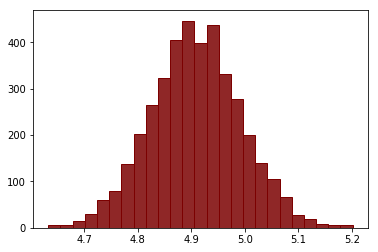

In [82]:
# Plot marginal posteriors
plot.hist(params2['lambda'], bins = 25, color = dark, ec = dark_highlight)
plot.show()

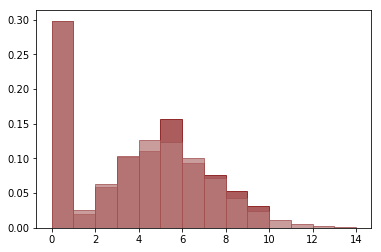

In [83]:
# Perform a posterior predictive check by plotting
# posterior predictive distributions against data
plot.hist(data['y'], bins=range(15), normed=True, alpha=0.75, color=dark, ec=dark_highlight)
plot.hist(params2['y_ppc'].flatten(), bins=range(15), normed=True,
          alpha=0.75, color=mid, ec=mid_highlight)
plot.show()
# truncated data at 10